<a href="https://colab.research.google.com/github/LukeZingg/MAT421/blob/main/Module_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Algebra Principles in Python**

Linear algebra makes up a critical mathematical framework used to solve a number of problem in the realm of physics, engineering, and other fields that rely on Python for their calculations.

Much of the work done in linear algebra is through the medium of vectors and matrices.

In [ ]:
#Creating vectors in Python
import numpy as np
vector = np.array([1,2,3,4,5,6])

print(vector)

[1 2 3 4 5 6]


In [ ]:
#Creating Matrices
matrix = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(matrix)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


Python allows us to run many calculations on vectors and matrices as seen below.

In [6]:
#Create our vectors
vector1 = np.array([1,2,3])
vector2 = np.array([4,5,6])

# Compute the dot product
dot_product = np.dot(vector1, vector2)
print("The Dot Product = ", dot_product)

#Compute the cross product
cross_product = np.cross(vector1, vector2)
print("The Cross Product = ", cross_product)

The Dot Product =  32
The Cross Product =  [-3  6 -3]


In [7]:
#Create our matrices

matrix1 = np.array([[1,2,3],[4,5,6],[7,8,9]])
matrix2 = np.array([[9,8,7],[6,5,4],[3,2,1]])

#Run calculations on our matrices
print("Matrix Addition = \n", matrix1 + matrix2)
print("Matrix Subtraction = \n", matrix1 - matrix2)
print("Matrix Multiplication = \n", matrix1 * matrix2)
print("Matrix Division = \n", matrix1 / matrix2)

Matrix Addition = 
 [[10 10 10]
 [10 10 10]
 [10 10 10]]
Matrix Subtraction = 
 [[-8 -6 -4]
 [-2  0  2]
 [ 4  6  8]]
Matrix Multiplication = 
 [[ 9 16 21]
 [24 25 24]
 [21 16  9]]
Matrix Division = 
 [[0.11111111 0.25       0.42857143]
 [0.66666667 1.         1.5       ]
 [2.33333333 4.         9.        ]]


Beyond basic matrix arithmetic, Python provides support for various matrix manipulations essential to linear algebra.

In [3]:
#Find the determinate and transponse of a matrix

# Create a matrix arbitrarily
matrix = np.array([[1, 5, 12],
                   [9, 3, 6],
                   [7, 5, 2]])

# Compute determinant
determinant = np.linalg.det(matrix)

# Compute transpose
transpose = matrix.T

# Print results
print("Matrix:")
print(matrix)
print("\nDeterminant:", determinant)
print("\nTranspose:")
print(transpose)

Matrix:
[[ 1  5 12]
 [ 9  3  6]
 [ 7  5  2]]

Determinant: 384.0

Transpose:
[[ 1  9  7]
 [ 5  3  5]
 [12  6  2]]


Eigenvalues and eigenvectors are key parts of linear algebra that are perhaps most commonly used in finding the solutions to differential equations. Python can find these vectors and values for us.

In [8]:
from numpy.linalg import eigh

matrix = np.array([[1,2,3],[4,5,6],[7,8,9]])

eigenvalues, eigenvectors = eigh(matrix)

print("Eigenvalues = ", eigenvalues)
print("Eigenvectors = ", eigenvectors)

Eigenvalues =  [-3.15746784 -0.67276795 18.8302358 ]
Eigenvectors =  [[-0.80238891  0.43402538 -0.40962667]
 [-0.16812656 -0.82296167 -0.54264865]
 [ 0.57263033  0.36654613 -0.73330651]]


Often if given a set of input vectors, we will want to produce an orthogonal (or orthonormal) basis, meaning the output vectors are perpendicular to each other (and normalized if desired). An orthogonal basis is useful because it simplifies many mathematical operations, like projections, decompositions, and solving linear systems, by eliminating dependencies between vectors and making calculations more efficient and numerically stable. We can find this orthogonal or orthanormal basis using a Gram-Schmidt process in Python.

In [ ]:
import numpy as np

def gram_schmidt(vectors):
    """Apply Gram-Schmidt process to a set of vectors."""
    orthogonal_vectors = []
    for v in vectors:
        # Start with the vector
        v_orth = v
        for u in orthogonal_vectors:
            # Subtract projection of v onto u
            v_orth -= np.dot(v, u) / np.dot(u, u) * u
        orthogonal_vectors.append(v_orth)
    return np.array(orthogonal_vectors)

# Example usage:
vectors = np.array([
    [1.0, 1.0, 0.0],
    [1.0, 0.0, 1.0],
    [0.0, 1.0, 1.0]
])

orthogonalized_vectors = gram_schmidt(vectors)

# Normalize for orthonormal basis (optional)
orthonormal_vectors = np.array([v / np.linalg.norm(v) for v in orthogonalized_vectors])

print("Orthogonal basis:")
print(orthogonalized_vectors)

print("\nOrthonormal basis:")
print(orthonormal_vectors)

Orthogonal basis:
[[ 1.          1.          0.        ]
 [ 0.5        -0.5         1.        ]
 [-0.66666667  0.66666667  0.66666667]]

Orthonormal basis:
[[ 0.70710678  0.70710678  0.        ]
 [ 0.40824829 -0.40824829  0.81649658]
 [-0.57735027  0.57735027  0.57735027]]


Finally, linear algebra can also be employed via the least squares method to find a linear regression model for data as seen below.

Regression Coefficients: Slope = 1.401, Intercept = 1.042


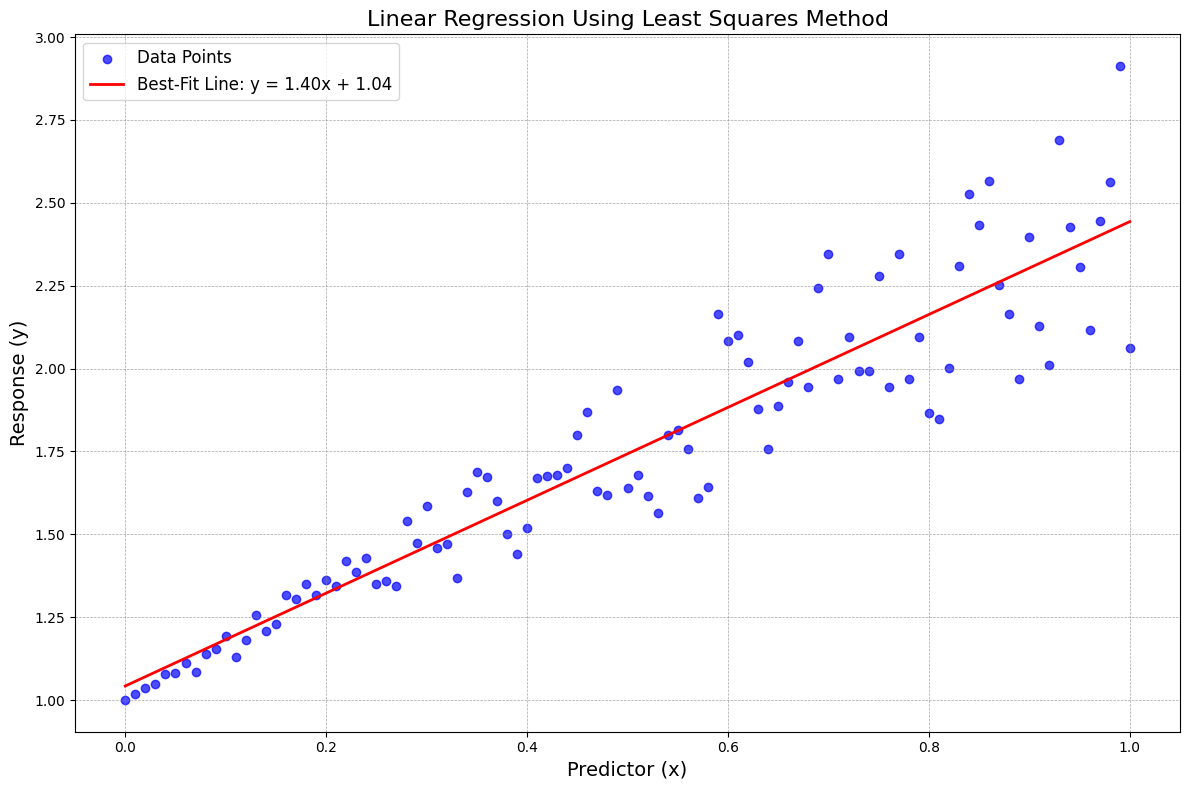

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

# Assemble matrix A (design matrix)
A = np.vstack([x, np.ones(len(x))]).T

# Turn y into a column vector
y = y[:, np.newaxis]

# Using pseudoinverse for regression
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(f"Regression Coefficients: Slope = {alpha[0][0]:.3f}, Intercept = {alpha[1][0]:.3f}")

# Plot results
plt.figure(figsize=(12, 8))

# Scatter plot of the data
plt.scatter(x, y, color='blue', alpha=0.7, label='Data Points')

# Plot the regression line
plt.plot(x, alpha[0] * x + alpha[1], color='red', lw=2, label=f'Best-Fit Line: y = {alpha[0][0]:.2f}x + {alpha[1][0]:.2f}')

# Adding labels and title
plt.xlabel('Predictor (x)', fontsize=14)
plt.ylabel('Response (y)', fontsize=14)
plt.title('Linear Regression Using Least Squares Method', fontsize=16)

# Adding a legend
plt.legend(fontsize=12)

# Add a grid for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()